<div style="width: 50%; float: left">
    <br>
    <strong>CARRERA: </strong> Computación
    <br>
    <strong>ESTUDIANTE: </strong>Christian Ronaldo Mocha
    <br>
</div>
<div style="width: 50%; float: left">
    <br>
    <strong align="center">PRUEBA PRÁCTICA</strong>
    <br>
    <br>
    <strong>ASIGNATURA: </strong>Simulación
    <br>
    <strong>TÍTULO: </strong>Prueba Práctica Unidad 1
    <br>
    <br>
</div>
<strong><center>ACTIVIDADES DESARROLLADAS</center></strong>

In [511]:
!pip install datapane
!pip install bokeh

In [512]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from datetime import datetime,timedelta
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import plotly.express as plotly
import datapane as dp

•	Diseñe y desarrolle un modelo y/o script que permita describir el siguiente caso aplicado:
<br>
◦	Se tiene los datos del ecuador 
(https://www.ecuadorencifras.gob.ec/documentos/web-inec/EMPLEO/2021/Octubre-2021/202110_Tabulados_Mercado_Laboral_CSV.zip): En base a ello obtener lo siguiente:
<br>
▪	Generar graficas para entender y procesar los datos:
<br>
•	Generar graficas y reportes del total de personas empleadas y desempleadas por año.


In [513]:
poblacion = pd.read_csv('/content/drive/MyDrive/decimo ciclo/qusis/Prueba1/1.Poblaciones.csv',encoding='latin1', sep=';',skiprows=2)
poblacion = poblacion.drop(poblacion.columns[[8,9,10,11,12,13,14,15,16,17,18]],axis=1)
poblacion.rename(columns ={'Unnamed: 0':'Encuesta','Unnamed: 1':'Periodo','Unnamed: 2':'Indicadores'}, inplace = True)
poblacion

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,dic-07,Población Total,13.682.302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,dic-07,Población menor de 15 años,4.372.812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,dic-07,Población en Edad de Trabajar (PET),9.309.490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,dic-07,Población Económicamente Activa,6.336.029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,dic-07,Empleo,6.019.332,3.971.040,2.048.292,3.632.314,2.387.018
...,...,...,...,...,...,...,...,...
895,ENEMDU*,oct-21,Desempleo Abierto,336.101,291.606,44.495,150.276,185.824
896,ENEMDU*,oct-21,Desempleo Oculto,48.103,27.600,20.503,25.975,22.128
897,ENEMDU*,oct-21,Desempleo Cesante,298.846,257.856,40.991,140.223,158.623
898,ENEMDU*,oct-21,Desempleo Nuevo,85.358,61.351,24.007,36.028,49.330


In [514]:
def eliminarPuntos(x):
  return int(x.replace(".",""))

In [515]:
poblacion["Total"] =  poblacion["Total"].apply(eliminarPuntos)

In [516]:
def anio(x):
  nu= x.split("-")
  return nu[1]


In [517]:
poblacion["Periodo"] = poblacion["Periodo"].apply(anio)
poblacion

,Encuesta,Periodo,Indicadores,Total,Urbana,Rural,Hombre,Mujer
0,ENEMDU,07,Población Total,13682302,9.066.209,4.616.093,6.768.646,6.913.656
1,ENEMDU,07,Población menor de 15 años,4372812,2.723.124,1.649.688,2.226.618,2.146.194
2,ENEMDU,07,Población en Edad de Trabajar (PET),9309490,6.343.085,2.966.404,4.542.028,4.767.462
3,ENEMDU,07,Población Económicamente Activa,6336029,4.227.702,2.108.328,3.777.232,2.558.798
4,ENEMDU,07,Empleo,6019332,3.971.040,2.048.292,3.632.314,2.387.018
...,...,...,...,...,...,...,...,...
895,ENEMDU*,21,Desempleo Abierto,336101,291.606,44.495,150.276,185.824
896,ENEMDU*,21,Desempleo Oculto,48103,27.600,20.503,25.975,22.128
897,ENEMDU*,21,Desempleo Cesante,298846,257.856,40.991,140.223,158.623
898,ENEMDU*,21,Desempleo Nuevo,85358,61.351,24.007,36.028,49.330


In [518]:
dataPoblacion = poblacion[['Periodo','Indicadores','Total']].groupby(['Periodo','Indicadores'], as_index=False).mean()
dataPoblacion

,Periodo,Indicadores,Total
0,07,Desempleo,316697.0
1,07,Desempleo Abierto,193225.0
2,07,Desempleo Cesante,190044.0
3,07,Desempleo Nuevo,126653.0
4,07,Desempleo Oculto,123472.0
...,...,...,...
266,21,Población en Edad de Trabajar (PET),12655772.8
267,21,Población menor de 15 años,5150507.2
268,21,Subempleo,1933593.1
269,21,Subempleo por insuficiencia de ingresos,211003.9


In [519]:
indicadorEmpleo = dataPoblacion[dataPoblacion['Indicadores'] == "Empleo"]
indicadorDesempleo = dataPoblacion[dataPoblacion['Indicadores'] == "Desempleo"]
indicadorEmpleo
indicadorDesempleo

 

,Periodo,Indicadores,Total
0,07,Desempleo,316697.00
18,08,Desempleo,362084.50
36,09,Desempleo,423802.00
54,10,Desempleo,365672.50
72,11,Desempleo,302996.00
90,12,Desempleo,279372.50
108,13,Desempleo,281348.00
126,14,Desempleo,304555.00
144,15,Desempleo,324618.00
162,16,Desempleo,423871.75




# Personas con empleo por año

In [598]:
def graficaempleo():
  fig, ax = plt.subplots(figsize =(12, 7))
  plt.bar( indicadorEmpleo["Periodo"],indicadorEmpleo["Total"], color='Beige')

  try:
      plt.ticklabel_format(axis='y', style='plain')
  except AttributeError:
      print('')
  plt.title('Empleados por Año')
  plt.xlabel('Año')
  plt.ylabel('Cantidad de Empleados')
  plt.grid(linestyle='--', linewidth=0.4)
  for index,data in enumerate(indicadorEmpleo["Total"]):
      plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=8), ha='center', color='green', va='bottom')
  plt.tight_layout()
  plt.show()
  return fig


#Personas con desempleo por año

In [599]:
def graficaDesempleo():
  fig, ax = plt.subplots(figsize =(16, 9))
  plt.bar(indicadorDesempleo["Periodo"],indicadorDesempleo["Total"], color='red')

  try:
      plt.ticklabel_format(axis='y', style='plain')
  except AttributeError:
      print('')
  plt.title('Personas con desempleo por Año')
  plt.xlabel('Año')
  plt.ylabel('Cantidad de dempleados')
  plt.grid(linestyle='--', linewidth=0.4)
  for index,data in enumerate(indicadorDesempleo["Total"]):
      plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10), ha='center', color='green', va='bottom')
  plt.tight_layout()
  plt.show()
  return fig


#•	Generar grafico de pie por personas basadas en la sectorización de empleo.

In [522]:
def getString(x):
  return str(x)
def getInt(x):
  return int(x)

In [523]:
def obtSectores(anio):
   dataSet = poblacion;
   dataSet['Periodo'] = dataSet['Periodo'].apply(getInt);
   dataSet = dataSet.query('Periodo == '+str(anio)+'');
   dataSet['Periodo'] = dataSet['Periodo'].apply(getString);
   return dataSet;

In [600]:
def graficaSectores():
  Urbano = obtSectores(8).iloc[-18:]
  Urbano['Urbana'] = Urbano['Urbana'].apply(eliminarPuntos);

  vecDatos=[]
  vecEtiquetas=[]
  for x in Urbano['Urbana']:
    vecDatos.append(x);
  for y in Urbano['Indicadores']:
    vecEtiquetas.append(y)
    
  fig = plotly.pie(values=vecDatos, names=vecEtiquetas) 
  fig.show()
  return fig


# •	Generar histogramas subempleo, empleo pleno y empleo no pleno por año.

In [525]:
subEmpleo = dataPoblacion[dataPoblacion['Indicadores'] == "Subempleo"]
empleoPleno = dataPoblacion[dataPoblacion['Indicadores'] == "Empleo Adecuado/Pleno"]
empleoNopleno = dataPoblacion[dataPoblacion['Indicadores'] == "Otro Empleo no pleno"]

In [601]:
def geficaSubEmNoEm():
  barWidth = 0.3
  fig = plt.subplots(figsize =(18, 8))

  IT = np.array(subEmpleo["Total"])
  ECE = np.array(empleoPleno["Total"])
  CSE = np.array(empleoNopleno["Total"])

  br1 = np.arange(len(IT))
  br2 = [x + barWidth for x in br1]
  br3 = [x + barWidth for x in br2]

  plt.bar(br1, IT, color ='y', width = barWidth,
          edgecolor ='grey', label ='Subempleo')
  plt.bar(br2, ECE, color ='c', width = barWidth,
          edgecolor ='grey', label ='Empleo Pleno')
  plt.bar(br3, CSE, color ='m', width = barWidth,
          edgecolor ='grey', label ='Empleo No pleno')

  plt.xlabel('Año', fontweight ='bold', fontsize = 15)
  plt.ylabel('Datos mostrando en millones', fontweight ='bold', fontsize = 15)
  plt.title('Personas con Subempleo, Empleo pleno y empleo no pleno',fontweight ='bold',)
  plt.xticks([r + barWidth for r in range(len(IT))],
          np.array(empleoNopleno["Periodo"]))

  plt.legend()
  plt.show()
  return plt


▪	Generar un reporte parametrizado que permita ingresar los datos de las fechas inicio y fin para obtener la información de las graficas vistas en el primer punto.

In [527]:
def getDataset(fechaInicio, fechaFin):
  dateInicio = int(fechaInicio)
  dateFIn = int(fechaFin)
  if dateInicio>=7 and dateFIn <=21:
    dataSet = poblacion;
    dataSet['Periodo'] = dataSet['Periodo'].apply(getInt);
    dataSet = dataSet.query('Periodo >='+fechaInicio+'& Periodo <= '+fechaFin)
    dataSet['Periodo'] = dataSet['Periodo'].apply(getString);
  
    return dataSet;
  else:
    print("Error el rango invalido, permito es: 7 a 21, su rango fue " + fechaInicio + " a " + fechaFin)


In [528]:
print("Buscar Personas Empleadas y Desempleadas")
print("Ingrese el rango en el que quiera buscar (Años)")
print("7 --> 2007 8 --> 2008")
print("Ingrese fecha de inicio")
fechaInicio = input();
print("Ingrese fecha de fin")
fechaFin = input();

empleados = getDataset(fechaInicio, fechaFin);
empleadoss = empleados[empleados['Indicadores'] == "Empleo"]
desempleados = empleados[empleados['Indicadores'] == "Desempleo"]

Buscar Personas Empleadas y Desempleadas
Ingrese el rango en el que quiera buscar (Años)
7 --> 2007 8 --> 2008
Ingrese fecha de inicio
7
Ingrese fecha de fin
21


In [602]:
def grafporAnio():
  fig, ax = plt.subplots(figsize =(20, 9))
  empleado = ['Empl ']
  desempleado = ['Des ']
  grafporAnio = plt.bar(empleado + empleadoss["Periodo"],empleadoss["Total"], label = 'Empleo', width = 0.5, color='lightblue')
  plt.bar(desempleado + desempleados["Periodo"],desempleados["Total"], label = 'Desempleo', width = 0.5, color='orange')


  try:
      plt.ticklabel_format(axis='y', style='plain')
  except AttributeError:
      print('')
  plt.title('Personas con Empleo y Desempleo por Año con datos de las fechas inicio y fin')
  plt.xlabel('Año')
  plt.ylabel('Cantidad de dempleados')
  plt.grid(linestyle='--', linewidth=0.4)
  plt.tight_layout()
  plt.show()
  return fig


#▪	Describir con estadística descriptiva los datos que se encuentran en el archivos.

In [530]:
df = pd.DataFrame(indicadorEmpleo.describe(), columns = ['Total'])
df1 = pd.DataFrame(desempleo.describe(), columns = ['Total'])
df2 = pd.DataFrame(subEmpleo.describe(), columns = ['Total'])
df3 = pd.DataFrame(empleoPleno.describe(), columns = ['Total'])
df4 = pd.DataFrame(empleoNopleno.describe(), columns = ['Total'])

print("Empleo \n ", df, "\n")
print("Desempleo \n ", df1, "\n")
print("SubEmpleo \n ", df2, "\n")
print("Empleo Adecuado/Pleno \n ", df3, "\n")
print("Otro Empleo no pleno \n ", df4, "\n")

Empleo 
                Total
count  1.500000e+01
mean   6.952479e+06
std    7.362216e+05
min    6.019332e+06
25%    6.204197e+06
50%    6.784414e+06
75%    7.719819e+06
max    7.917790e+06 

Desempleo 
                 Total
count      15.000000
mean   355114.363333
std     56871.589568
min    279372.500000
25%    310626.000000
50%    358466.500000
75%    394737.250000
max    456457.500000 

SubEmpleo 
                Total
count  1.500000e+01
mean   1.229065e+06
std    4.250236e+05
min    6.344360e+05
25%    9.278525e+05
50%    1.071615e+06
75%    1.531731e+06
max    1.978117e+06 

Empleo Adecuado/Pleno 
                Total
count  1.500000e+01
mean   2.984756e+06
std    3.148057e+05
min    2.395944e+06
25%    2.766348e+06
50%    3.111499e+06
75%    3.219239e+06
max    3.404390e+06 

Otro Empleo no pleno 
                Total
count  1.500000e+01
mean   1.991426e+06
std    2.186774e+05
min    1.504000e+06
25%    1.886346e+06
50%    2.040986e+06
75%    2.122606e+06
max    2.265990e+0

#REPORTE

[05:57:52] [INFO ] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[05:57:52] [INFO ] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


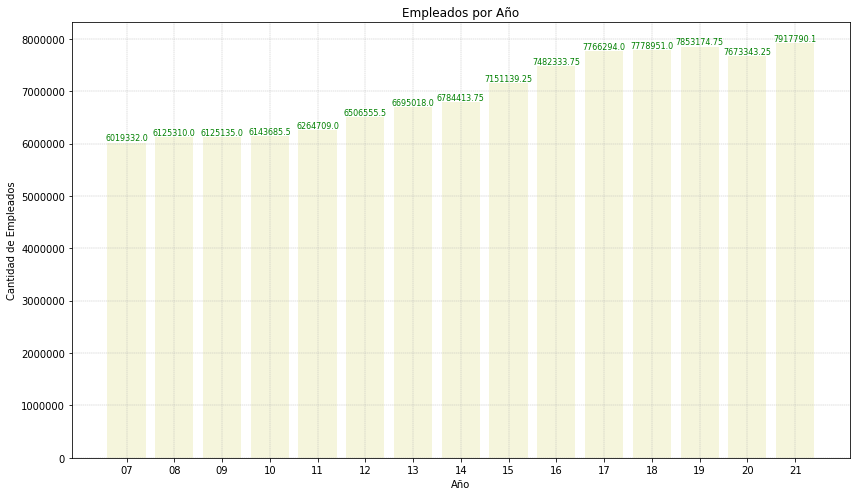

[05:57:53] [INFO ] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[05:57:53] [INFO ] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


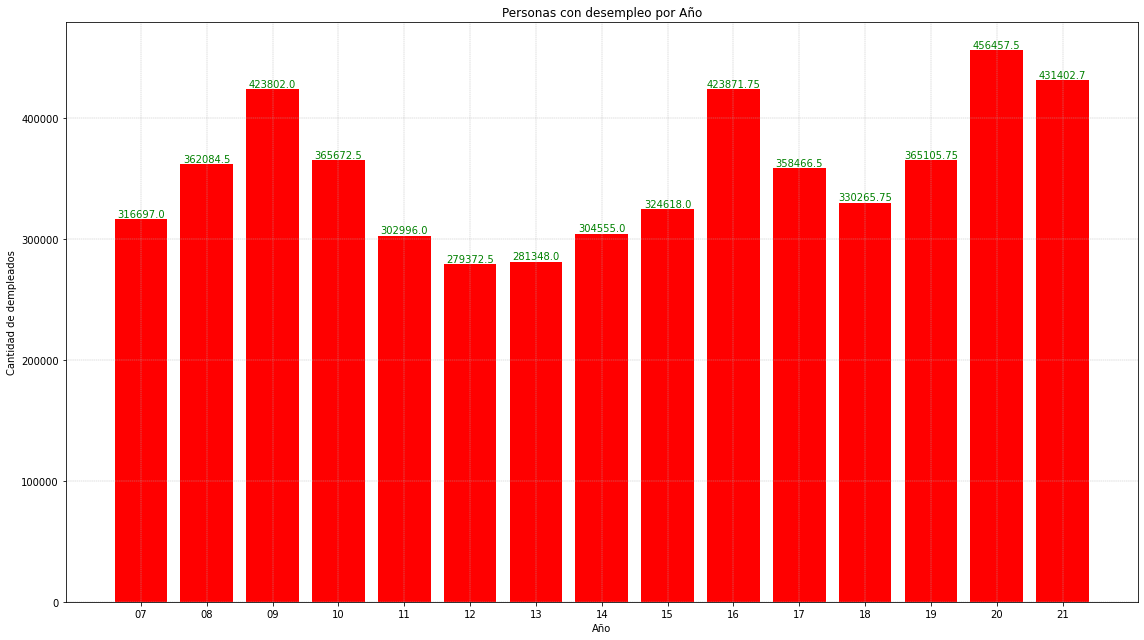

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



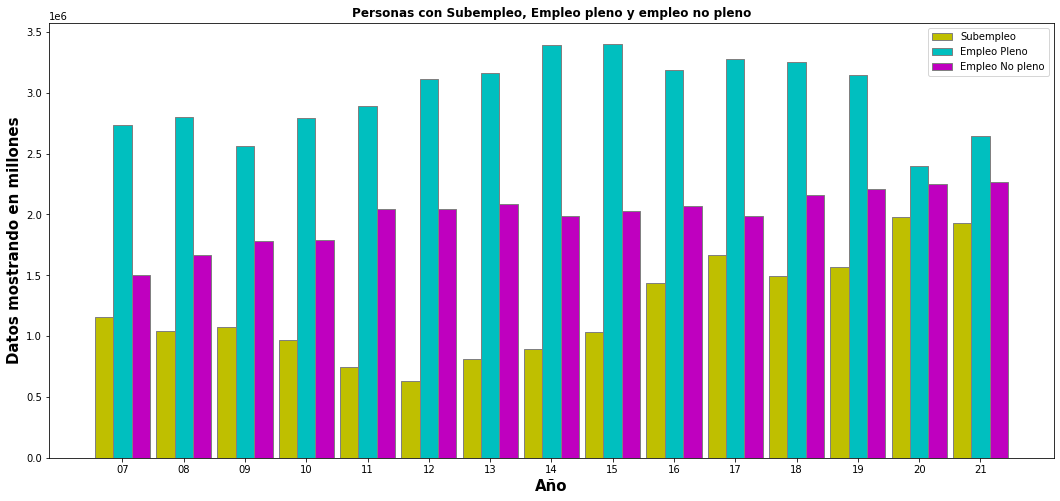

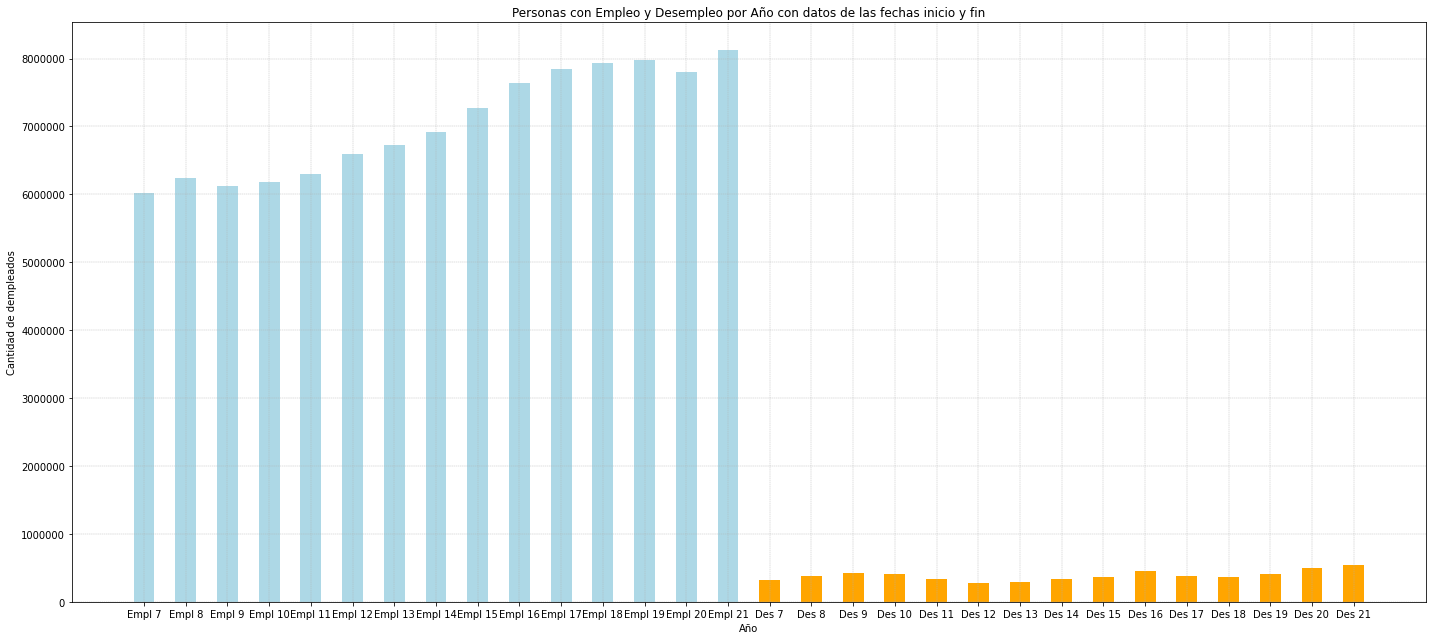

In [603]:
graficaempleo = graficaempleo()
graficaDesempleo = graficaDesempleo()
graficaSectores = graficaSectores()
geficaSubEmNoEm = geficaSubEmNoEm()
grafporAnio = grafporAnio()



In [607]:
report = dp.Report(dp.Text("""## Descripción de datos"""), dp.Text("""## Empleo"""), dp.Plot(graficaempleo), dp.Text("""## Desempleo"""), dp.Plot(graficaDesempleo), dp.Text("""## Sectores"""), dp.Plot(graficaSectores),  dp.Text("""## Empleo y desempleo con fecha de inicio y fin"""), dp.Plot(grafporAnio), ) 
file_name = "reportePrueba.html"
report.save(path=file_name,open=True)

[05:59:33] [DEBUG] Saved object to /tmp/dp-tmp-uzlm_v0f/dp-tmp-4n_levt8.svg (52930 bytes)
[05:59:33] [DEBUG] Saved object to /tmp/dp-tmp-uzlm_v0f/dp-tmp-4ytr22cf.svg (49804 bytes)
[05:59:33] [DEBUG] Saved object to /tmp/dp-tmp-uzlm_v0f/dp-tmp-dpqwoq4x.pl.json (8704 bytes)
[05:59:33] [DEBUG] Saved object to /tmp/dp-tmp-uzlm_v0f/dp-tmp-jmz4ys9r.svg (83060 bytes)
[05:59:33] [DEBUG] Successfully Built Report


Report saved to ./reportePrueba.html. To upload and share your report, create a free Datapane account by running `datapane signup`.


#Analisis
• Con respecto a las dos primeras graficas de empleos y desempleos por año existe de un 20% a 30% mas  personas con empleos que personas desempleadas.
<br>
• Con respecto al diagrama de paste se muestra que existe varios sectores y de esta forma es facil indetificar los valores altos y los bajos.

#Concluciones
• Este trabajo que se realizo fue muy util ya que con esto se pudo profundisar en temas importantes como son las graficas, tomar datos de un csv, etc. <br>
• Todos los datos que se obtuvo se logra concluir que los empleados en los ultimos 4 periodos se tiene un aumento del total de la
población a comparacion de los desempleados se tiene una gran baja en el empleo.

#Recomendaciones
• Se recomienda trabajar con todas las librerias actualizadas para evitar errores. <br>
• Se recomienda analizar el dataSet antes de trabajarlo por ejemplo en el data set que se trabajo existia columnas sin nombre.